In [1]:
from vae import VAEModel
from load_data import load_mnist

## Load data

In [2]:
X_train, y_train, X_test, y_test = load_mnist()

## Train VAE

In [3]:
model = VAEModel(50, 10)

In [4]:
_ = model.train_vae(X_train, 100, learning_rate=1e-3, batch_size=512)

Epoch 0: error = 235.4052
Epoch 1: error = 206.4987
Epoch 2: error = 204.4925
Epoch 3: error = 203.3529


Test loss = 88.8668


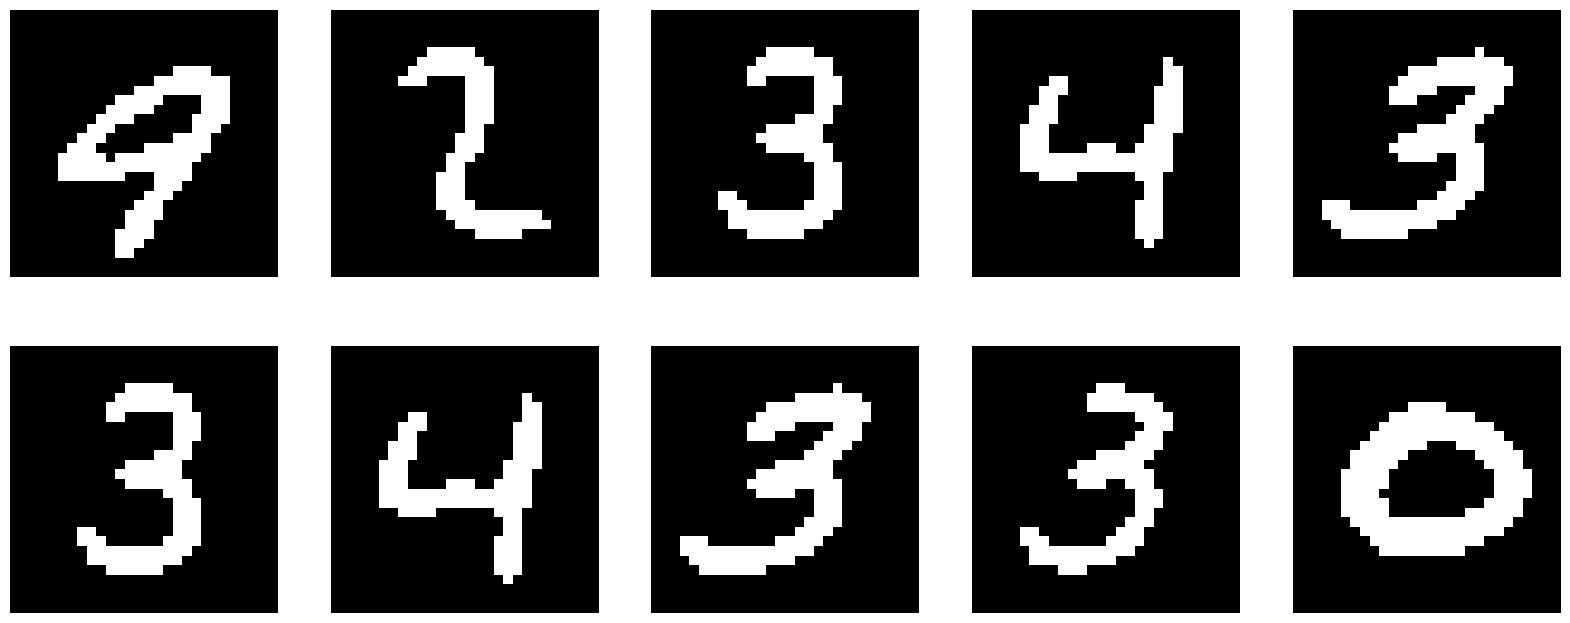

In [ ]:
l, r = model.test_vae(X_test)

## Generate new samples

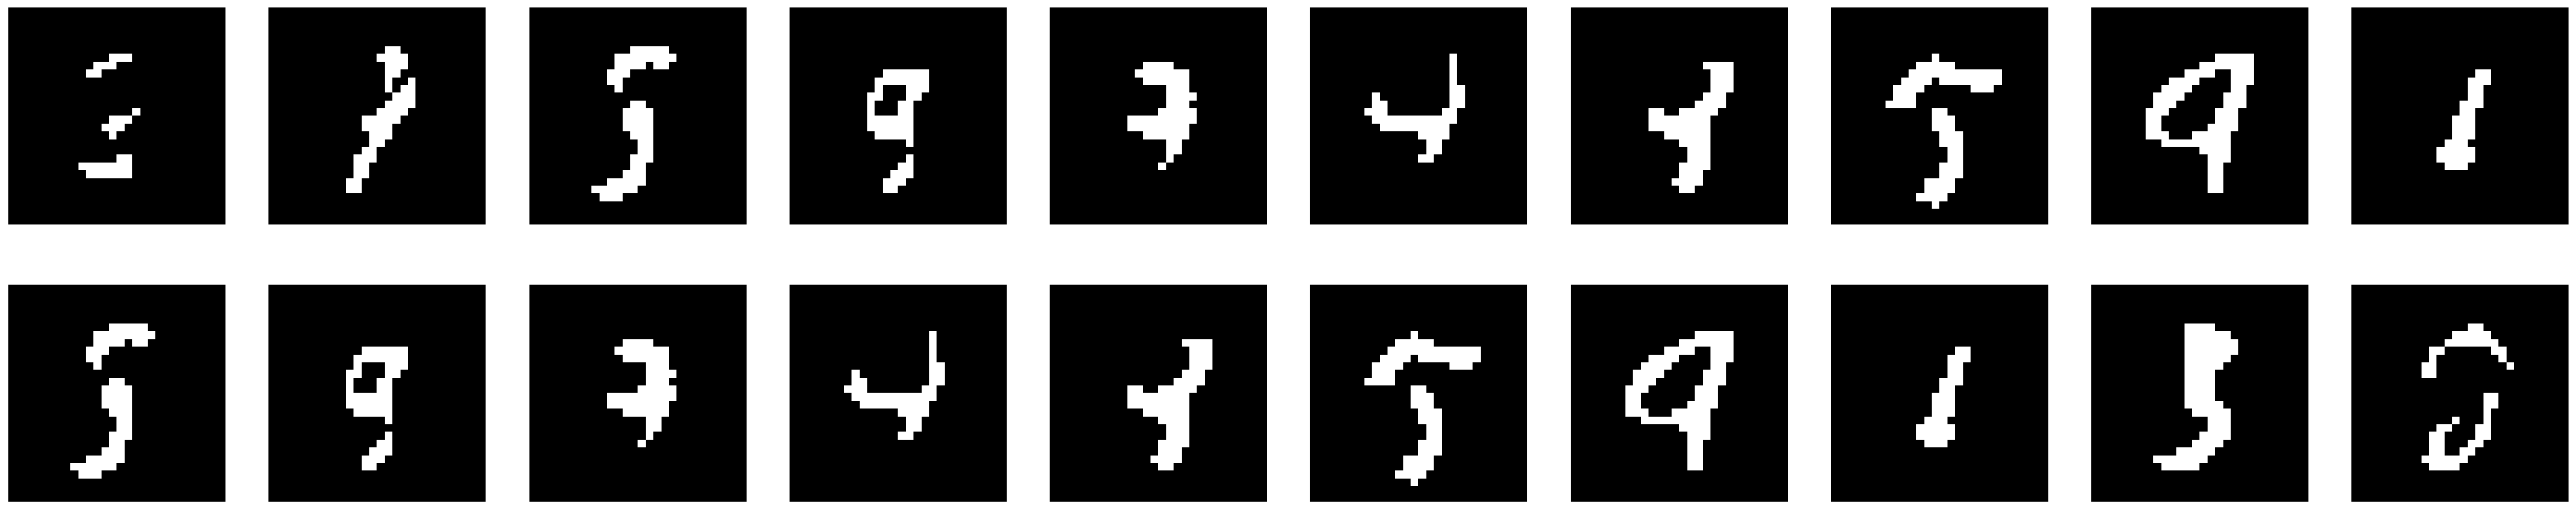

In [ ]:
gen = model.generate_data()